In [1]:
# Keşifci projesi.
import numpy as np
import seaborn as sns
import seaborn as sbn
import pandas as pd 
import missingno as msg # pip install missingno
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, f1_score, precision_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm

In [2]:
df = pd.read_csv("tablet.csv") # verileri okuduk.

In [3]:
df.shape # burada biz kaç tane veri var bunu görebiliriz. 2000 satır 20 sutundan oluşan bir veri çerçevesi.

(2000, 20)

In [4]:
df.isnull().sum() # sadece RAM kısmında boş veri var bunu görebiliriz. ve Onkameramp kısmında 5 tane null veri var.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

In [5]:
df.head(10) # ilk 10 data ve sutun yapısını görebiliriz. 

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
5,1162,Yok,1.0,Yok,0.0,Yok,50,0.5,104,4,10,332,866,1404.0,15,Var,Var,Var,Ucuz,Beyaz
6,1849,Var,0.5,Yok,1.0,Yok,29,0.5,181,7,12,978,1986,3330.0,15,Var,Yok,Var,Pahalı,Gri
7,1860,Yok,0.5,Var,2.0,Var,55,0.7,83,6,3,195,799,676.0,4,Var,Yok,Var,Çok Ucuz,Beyaz
8,1536,Yok,0.8,Yok,12.0,Yok,13,0.3,105,7,20,22,1634,2020.0,16,Var,Var,Yok,Normal,Sarı
9,539,Var,0.6,Var,9.0,Yok,21,0.1,145,7,14,551,599,3597.0,9,Yok,Yok,Yok,Normal,Mavi


In [6]:
df.tail() # son 5 verinin yapısını görmek lazım default olarak.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz
1999,1872,Yok,0.5,Yok,5.0,Var,26,0.5,172,4,10,672,1088,2273.0,8,Var,Yok,Var,Normal,Siyah


In [7]:
df.info() # df hakkında önemli bilgileri görebiliriz.  burada dtypes: float64(4), int64(8), object(8) yazıyor mesela bu 4 adet float64  vsolduğunu belli eder. buradan veri tipleri belli olan 20 adet sutunu görebiliriz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [8]:
df.describe().T # Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.  .T ile transpoz alırız. satır sutun yer değiştirir. yan döner veri çervevesi.

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [9]:
df.dtypes # sutunların veri yapsıını görebiliriz. Veri çerçevesinin özniteliklerin data tiplerini görüntüleyelim.

BataryaGucu              int64
Bluetooth               object
MikroislemciHizi       float64
CiftHat                 object
OnKameraMP             float64
4G                      object
DahiliBellek             int64
Kalinlik               float64
Agirlik                  int64
CekirdekSayisi           int64
ArkaKameraMP             int64
CozunurlukYükseklik      int64
CozunurlukGenislik       int64
RAM                    float64
BataryaOmru              int64
3G                      object
Dokunmatik              object
WiFi                    object
FiyatAraligi            object
Renk                    object
dtype: object

In [10]:
df.isnull().sum().sum() # toplam kaç tane boş veri var komple görebiliriz. toplam 17 adet boş veri var.  df.isnull().sum()  ile her sutunda kaç tane boş veri olduğunu görebiliriz.

17

In [11]:
df["Bluetooth"].value_counts() #Veri çerçevemizdeki Bluetooth öznitelik değerlerinin kaçar adet olduğunu görüntüleyelim.

Bluetooth
Yok    1010
Var     990
Name: count, dtype: int64

In [12]:
df["4G"].value_counts() #Veri çerçevemizdeki 4G öznitelik değerlerinin kaçar adet olduğunu görüntüleyelim.

4G
Var    1043
Yok     957
Name: count, dtype: int64

In [13]:
df["CiftHat"].value_counts() # Veri çerçevemizdeki ÇiftHat öznitelik değerlerinin kaçar adet olduğunu görüntüleyelim.

CiftHat
Var    1019
Yok     981
Name: count, dtype: int64

In [14]:
df["3G"].value_counts() # Veri çerçevemizdeki 3G öznitelik değerlerinin kaçar adet olduğunu görüntüleyelim.

3G
Var    1523
Yok     477
Name: count, dtype: int64

In [15]:
df["ArkaKameraMP"].value_counts() # Veri çerçevemizdeki ArkaKameraMP öznitelik değerlerinin kaçar adet olduğunu görüntüleyelim.

ArkaKameraMP
10    122
7     119
9     112
20    110
14    104
1     104
0     101
2      99
17     99
6      95
4      95
3      93
15     92
12     90
8      89
16     88
13     85
19     83
18     82
11     79
5      59
Name: count, dtype: int64

In [16]:
df["Renk"].value_counts() # Veri çerçevemizdeki Renk öznitelik değerlerinin kaçar adet olduğunu görüntüleyelim.

Renk
Beyaz         194
Siyah         183
Mor           175
Turuncu       175
Pembe         168
Kırmızı       168
Turkuaz       167
Kahverengi    157
Sarı          156
Yeşil         154
Gri           153
Mavi          150
Name: count, dtype: int64

In [17]:
df.corr() # Veri çerçevesinin tüm sütunların ikili korelasyonunu bulmak için kullanılır. .Gözlemlediğimiz üzere en güçlü pozitif ilişki OnKameraMP ve ArkaKameraMP arasında bulunmaktadır.
# verilerin arasındaki ilişkiyi görebiliriz.  1'e ne kadar yakında sutunlar arasındaki ilişki o kadar fazladır.

ValueError: could not convert string to float: 'Yok'

C:\Users\emrea\AppData\Local\Temp\ipykernel_27384\2585355799.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

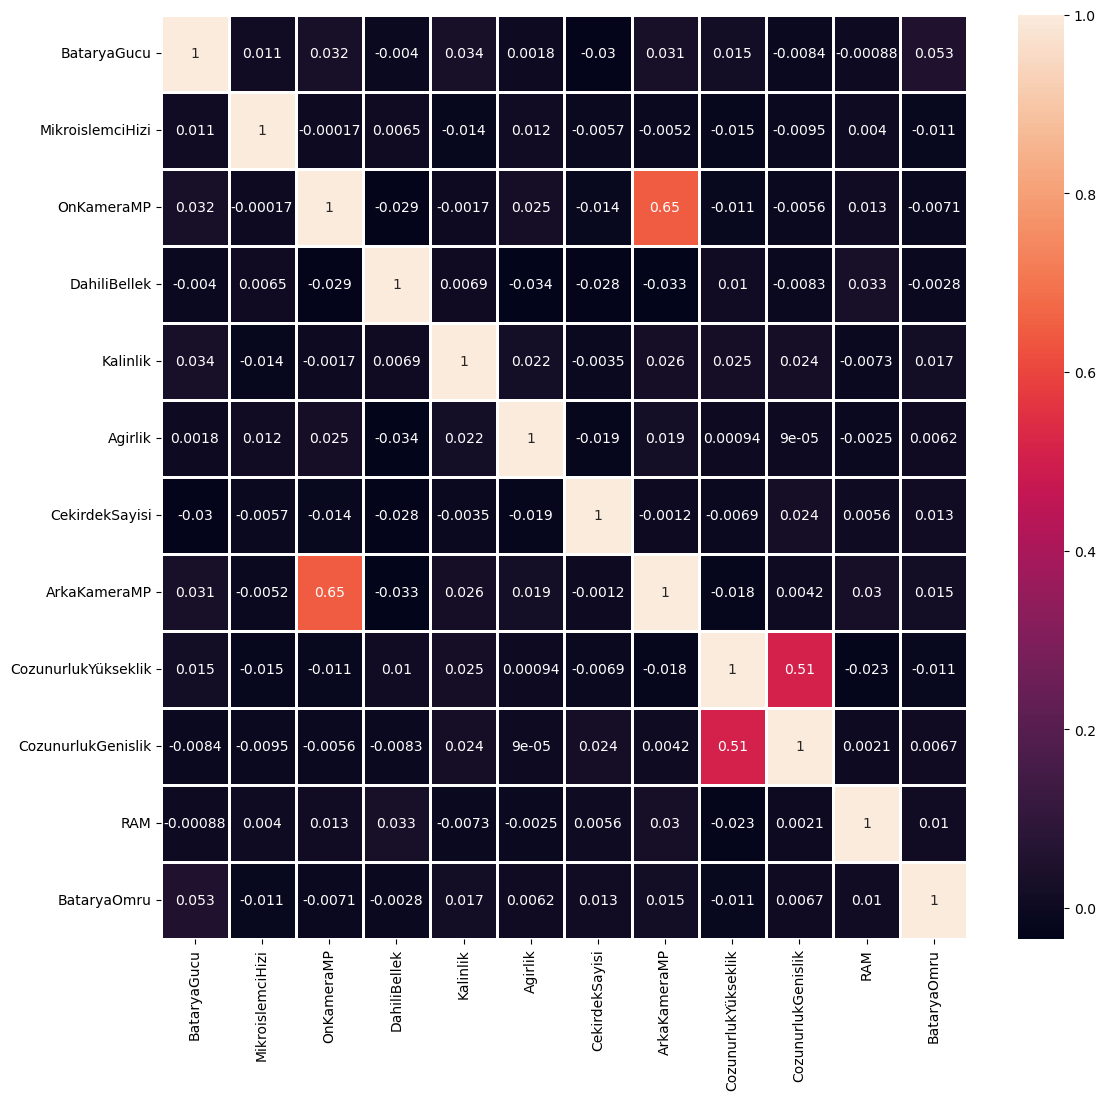

In [ ]:
corr = df.corr()
fig,ax = plt.subplots(figsize = (13,12))
sbn.heatmap(corr,annot = True,ax = ax,linewidths=1,xticklabels=True,yticklabels=True)
# Korelasyonu ısı haritasından daha net görüntüleyelim. 'OnKameraMP' ve 'ArkaKameraMP' değerleri arasında pozitif ve oranına bakarsak orta derecede bir korelasyon var. 0.65 korelasyon katsayımız vardır. Pozitif ve orta derece ilişkiye sahiptirler.

In [ ]:
df["ArkaKameraMP"].nunique()
# kaç adet farklı kamera mp'i varmış görebiliriz.  21 adet mesela

21

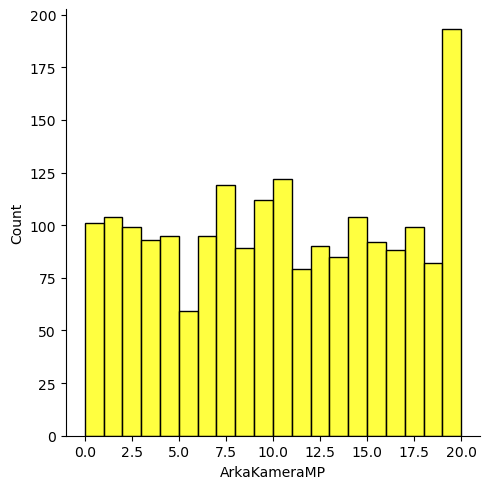

In [ ]:
sbn.displot(df["ArkaKameraMP"], bins = 20, color = "yellow") 
# ArkaKameraMP değerlerine göre tablet sayısının dağılımını distplot grafiğiyle görüntüleyelim.

In [ ]:
# OnKameraMP özniteliği için kaç adet eşsiz değer olduğunu görüntüleyelim.
df["OnKameraMP"].nunique() # 20 adet farklı onkamera mp'si varmış mesela.

20

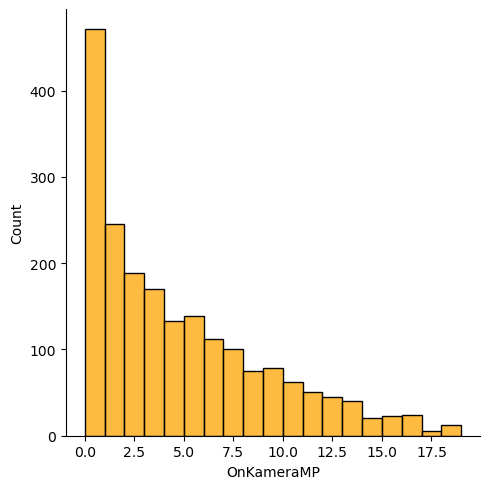

In [ ]:
sbn.displot(df["OnKameraMP"], bins = 19, color = "orange")
# OnKameraMP değerlerine göre tablet sayısının dağılımını distplot grafiğiyle görüntüleyelim.

In [ ]:
df["CozunurlukGenislik"].nunique()
# CozunurlukGenislik özniteliği için kaç adet eşsiz değer olduğunu görüntüleyelim.


1109

C:\Users\emrea\AppData\Local\Temp\ipykernel_27384\3339285553.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(df["CozunurlukGenislik"], bins = 20, color = "green");


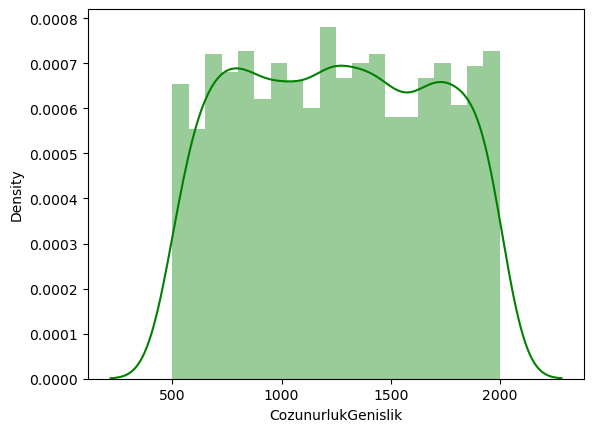

In [ ]:
# CozunurlukGenislik özniteliğinin değerlerine göre dağılımını distplot grafiği yardımıyla gösterelim.
sbn.distplot(df["CozunurlukGenislik"], bins = 20, color = "green");

In [ ]:
df["FiyatAraligi"].unique() # FiyatAraligi özniteliği için eşsiz değerleri görüntüleyelim. df["FiyatAraligi"].nunique()  ile ise kaç adet fiyat aralığı var görebiliriz.

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

<Axes: xlabel='FiyatAraligi', ylabel='count'>

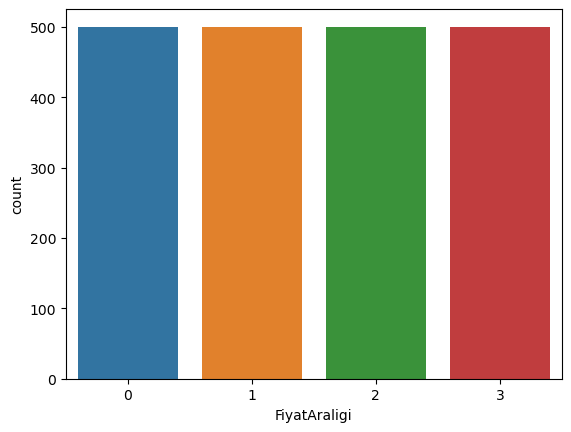

In [ ]:
# Fiyat Aralıklarına göre tablet miktarlarının dağılımını countplot grafiği yardımıyla görüntüleyelim.
sbn.countplot(x = "FiyatAraligi", data = df,)

<Figure size 1500x500 with 0 Axes>

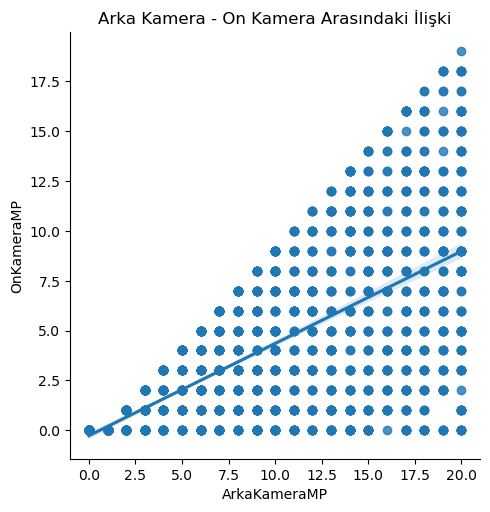

In [ ]:
# Arka Kamera ve Ön Kamera arasındaki ilişkiyi Implot grafiğiyle görüntüleyelim. Pozitif bir ilişki vardır.

plt.figure(figsize=(15,5))
sns.lmplot(x="ArkaKameraMP", y="OnKameraMP", data=df)
plt.title('Arka Kamera - On Kamera Arasındaki İlişki')
plt.show()

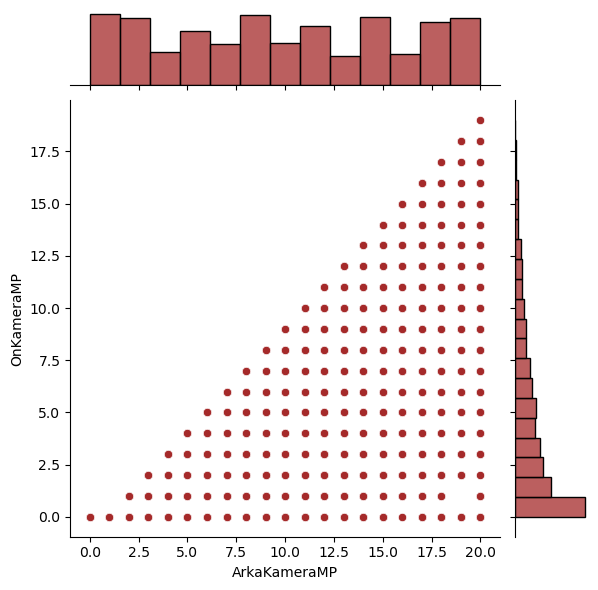

In [ ]:
# Arka Kamera ve Ön Kamera arasındaki ilişkiyi jointplot grafiğiyle detaylandıralım.
sbn.jointplot(x = "ArkaKameraMP", y = "OnKameraMP", data = df, color="brown");

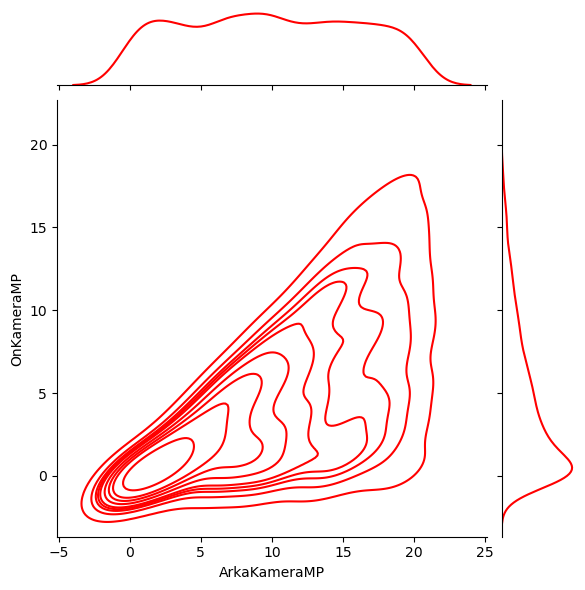

In [ ]:
# Jointplot grafiğine kind="kde" parametresini vererek yoğunluk haritasını görelim.

sbn.jointplot(y = df["OnKameraMP"], x = df["ArkaKameraMP"], kind = "kde", color = "red");

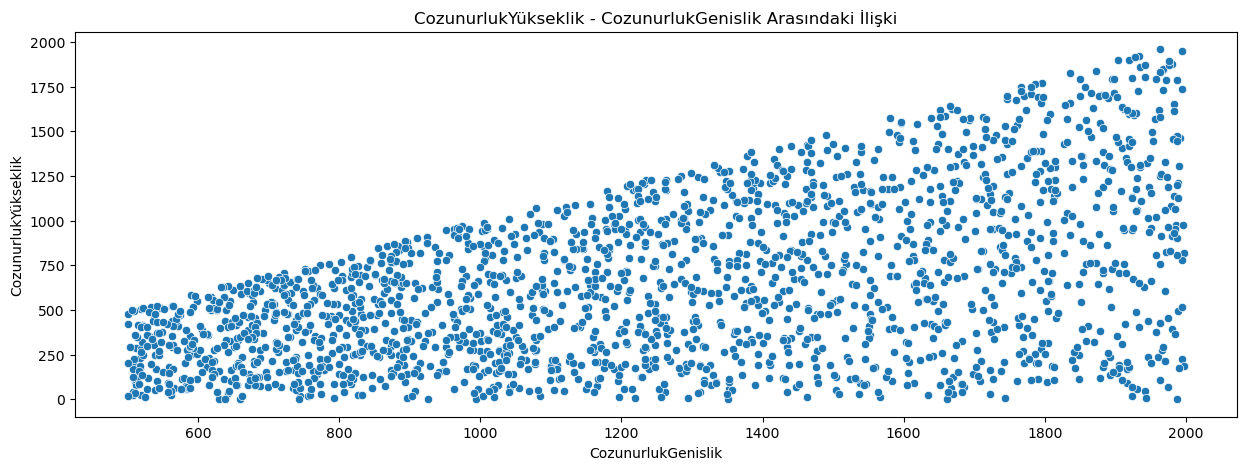

In [ ]:
# CozunurlukYukseklik ve CozunurlukGenislik arasındaki ilişkiyi scatterplot grafiğiyle görüntüleyelim.
plt.figure(figsize=(15,5))
sbn.scatterplot(x="CozunurlukGenislik", y="CozunurlukYükseklik", data=df)
plt.title('CozunurlukYükseklik - CozunurlukGenislik Arasındaki İlişki')
plt.show()

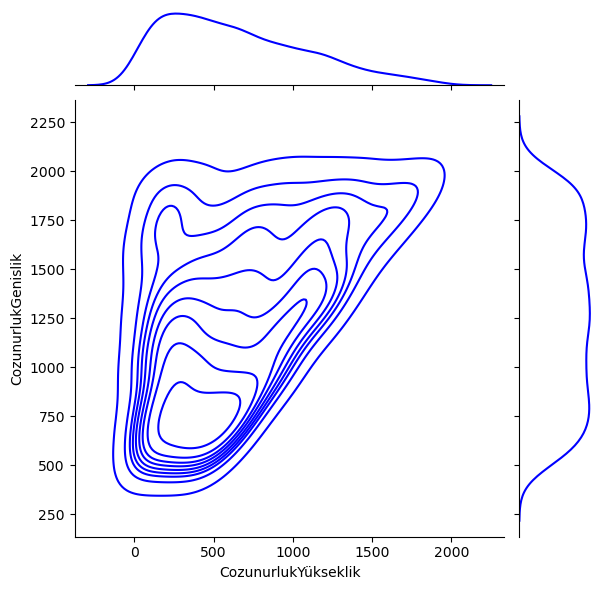

In [ ]:
# CozunurlukYükseklik değerimiz 0-500 değerleri arasında yoğunlaşmıştır.CozunurlukGenislik değerlerimiz 0-2000 arasında bulunmaktadır. Bu yoğunlukların dağılımını jointplot grafiğinde detaylıca görebiliriz.

sbn.jointplot(x = df["CozunurlukYükseklik"], y = df["CozunurlukGenislik"], kind = "kde", color = "blue")

In [ ]:
# GroupBy fonksiyonuyla FiyatAraligi özniteliğinin diğer özniteliklerle arasındaki ortalamasını alalım.

df.groupby(["FiyatAraligi"]).mean().T # group by ile gruplama yaparız. mean() ile ortalama alırız.  .T ile tranpoz alırız.

C:\Users\emrea\AppData\Local\Temp\ipykernel_27384\1850904783.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["FiyatAraligi"]).mean().T


FiyatAraligi,Normal,Pahalı,Ucuz,Çok Ucuz
BataryaGucu,1228.3200,1379.98400,1228.8680,1116.902000
MikroislemciHizi,1.5298,1.52040,1.4886,1.550200
OnKameraMP,4.4980,4.31600,4.3400,4.092929
DahiliBellek,30.9200,33.97600,32.1160,31.174000
Kalinlik,0.4908,0.50200,0.5240,0.490200
Agirlik,143.6140,136.32000,140.5100,140.552000
CekirdekSayisi,4.6820,4.50200,4.2980,4.600000
ArkaKameraMP,10.0180,10.15000,9.9240,9.574000
CozunurlukYükseklik,632.2840,744.84800,666.8920,536.408000
CozunurlukGenislik,1234.0460,1369.83800,1251.9080,1150.270000


In [ ]:
# GroupBy fonksiyonuyla FiyatAraligi özniteliğinin diğer özniteliklerle arasındaki standart sapmasını alalım.

df.groupby(["FiyatAraligi"]).std().T  # standart sapmalara bakabiliriz.  fiyataralığına ve diğer sutunlara göre.

C:\Users\emrea\AppData\Local\Temp\ipykernel_27384\3438197317.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["FiyatAraligi"]).std().T


FiyatAraligi,Normal,Pahalı,Ucuz,Çok Ucuz
BataryaGucu,452.863065,414.992261,438.614528,410.801305
MikroislemciHizi,0.804404,0.796450,0.814479,0.848941
OnKameraMP,4.347390,4.332399,4.499432,4.185411
DahiliBellek,18.441958,17.930377,18.000739,18.101023
Kalinlik,0.286215,0.291901,0.286895,0.288184
Agirlik,34.320326,34.911994,35.678956,36.378319
CekirdekSayisi,2.262546,2.297074,2.311684,2.268544
ArkaKameraMP,5.952861,6.085521,6.124806,6.095805
CozunurlukYükseklik,445.789232,483.720179,441.351209,372.824164
CozunurlukGenislik,427.757151,426.823571,433.564352,413.001780


<Axes: xlabel='FiyatAraligi', ylabel='RAM'>

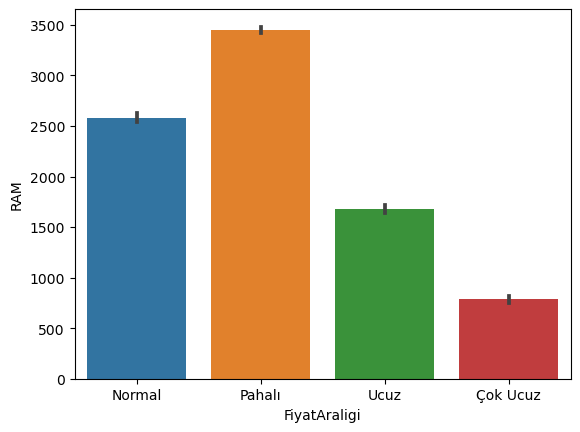

In [ ]:
# FiyatAraligi ve RAM özniteliklerinin arasındaki ilişkiyi barplot yardımıyla görüntüleyelim.

sbn.barplot(x = "FiyatAraligi", y = "RAM", data = df)

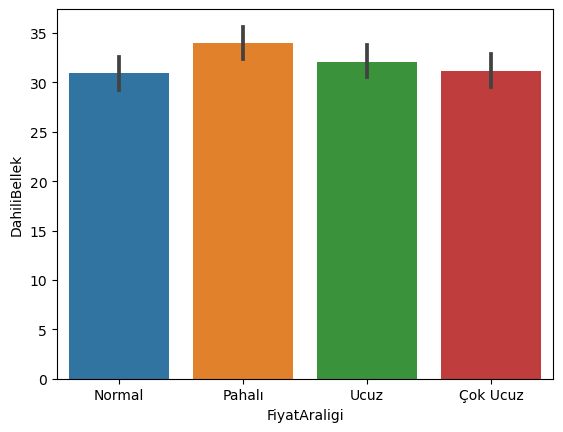

In [ ]:
# FiyatAraligi ve DahiliBellek özniteliklerinin arasındaki ilişkiyi barplot yardımıyla görüntüleyelim.

sbn.barplot( x = "FiyatAraligi",y= "DahiliBellek", data = df)

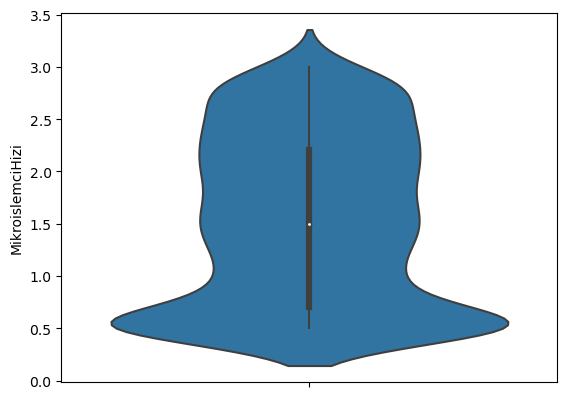

In [ ]:
# Mikro İşlemci Hız değerlerinin dağılımını keman grafiğiyle görüntüleyelim.
sns.violinplot(y = "MikroislemciHizi", data = df)

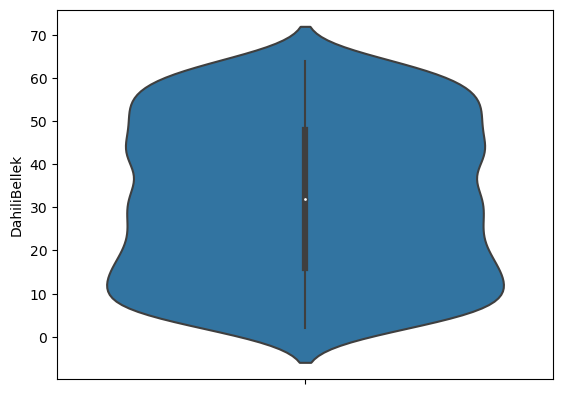

In [ ]:
# Dahili Bellek değerlerinin dağılımını keman grafiğiyle görüntüleyelim.

sbn.violinplot(y = "DahiliBellek", data = df)

In [ ]:
# Fiyat Aralıklarına göre RAM değerlerinin yoğunluğunu violinplot grafiğiyle gösterelim.
# sbn.violinplot(df["FiyatAraligi"],df["RAM"]);

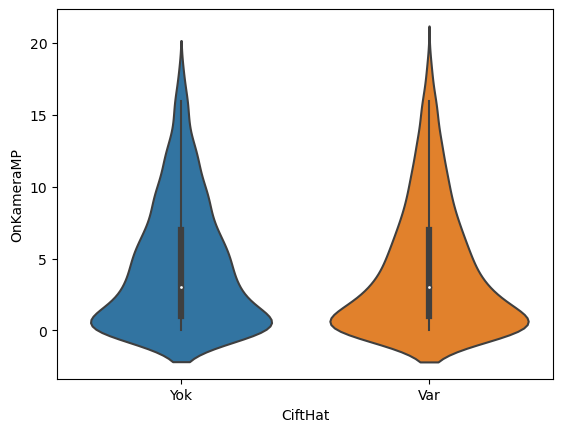

In [ ]:
# Çİft Hat ile OnKameraMP öznitelikleri arasında bir ilişki olmadığını gösterelim.
sbn.violinplot(x ="CiftHat",y = "OnKameraMP"  , data = df)

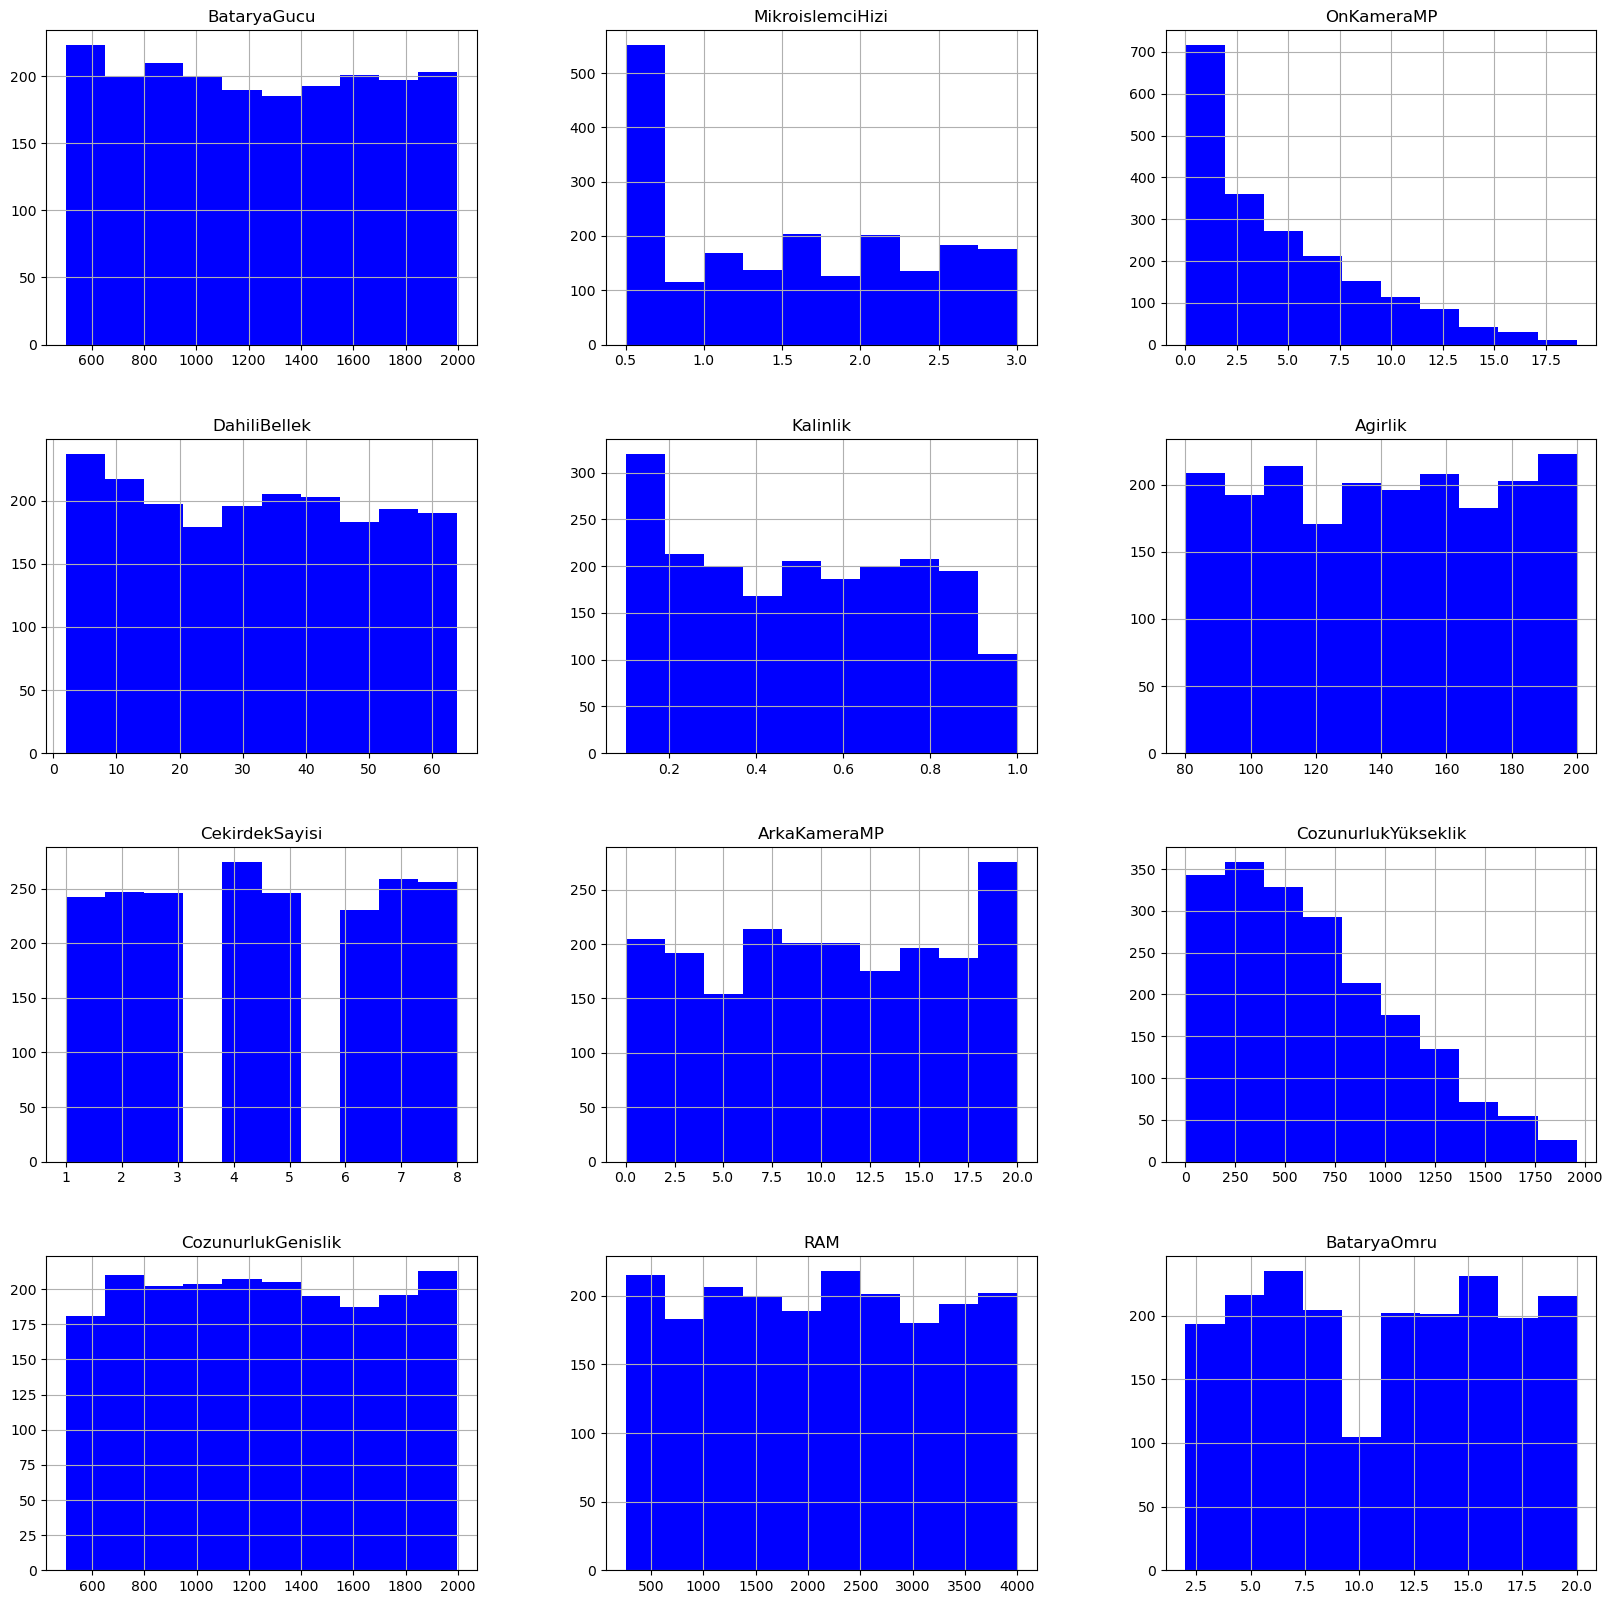

In [ ]:
# Veri çerçevemizdeki özniteliklerin kendi değerlerine göre dağılımlarını görelim.
df.hist(figsize =(20,20), color = "blue")
plt.show()

## VERİ ÖNİŞLEME

In [ ]:
df.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'],
      dtype='object')

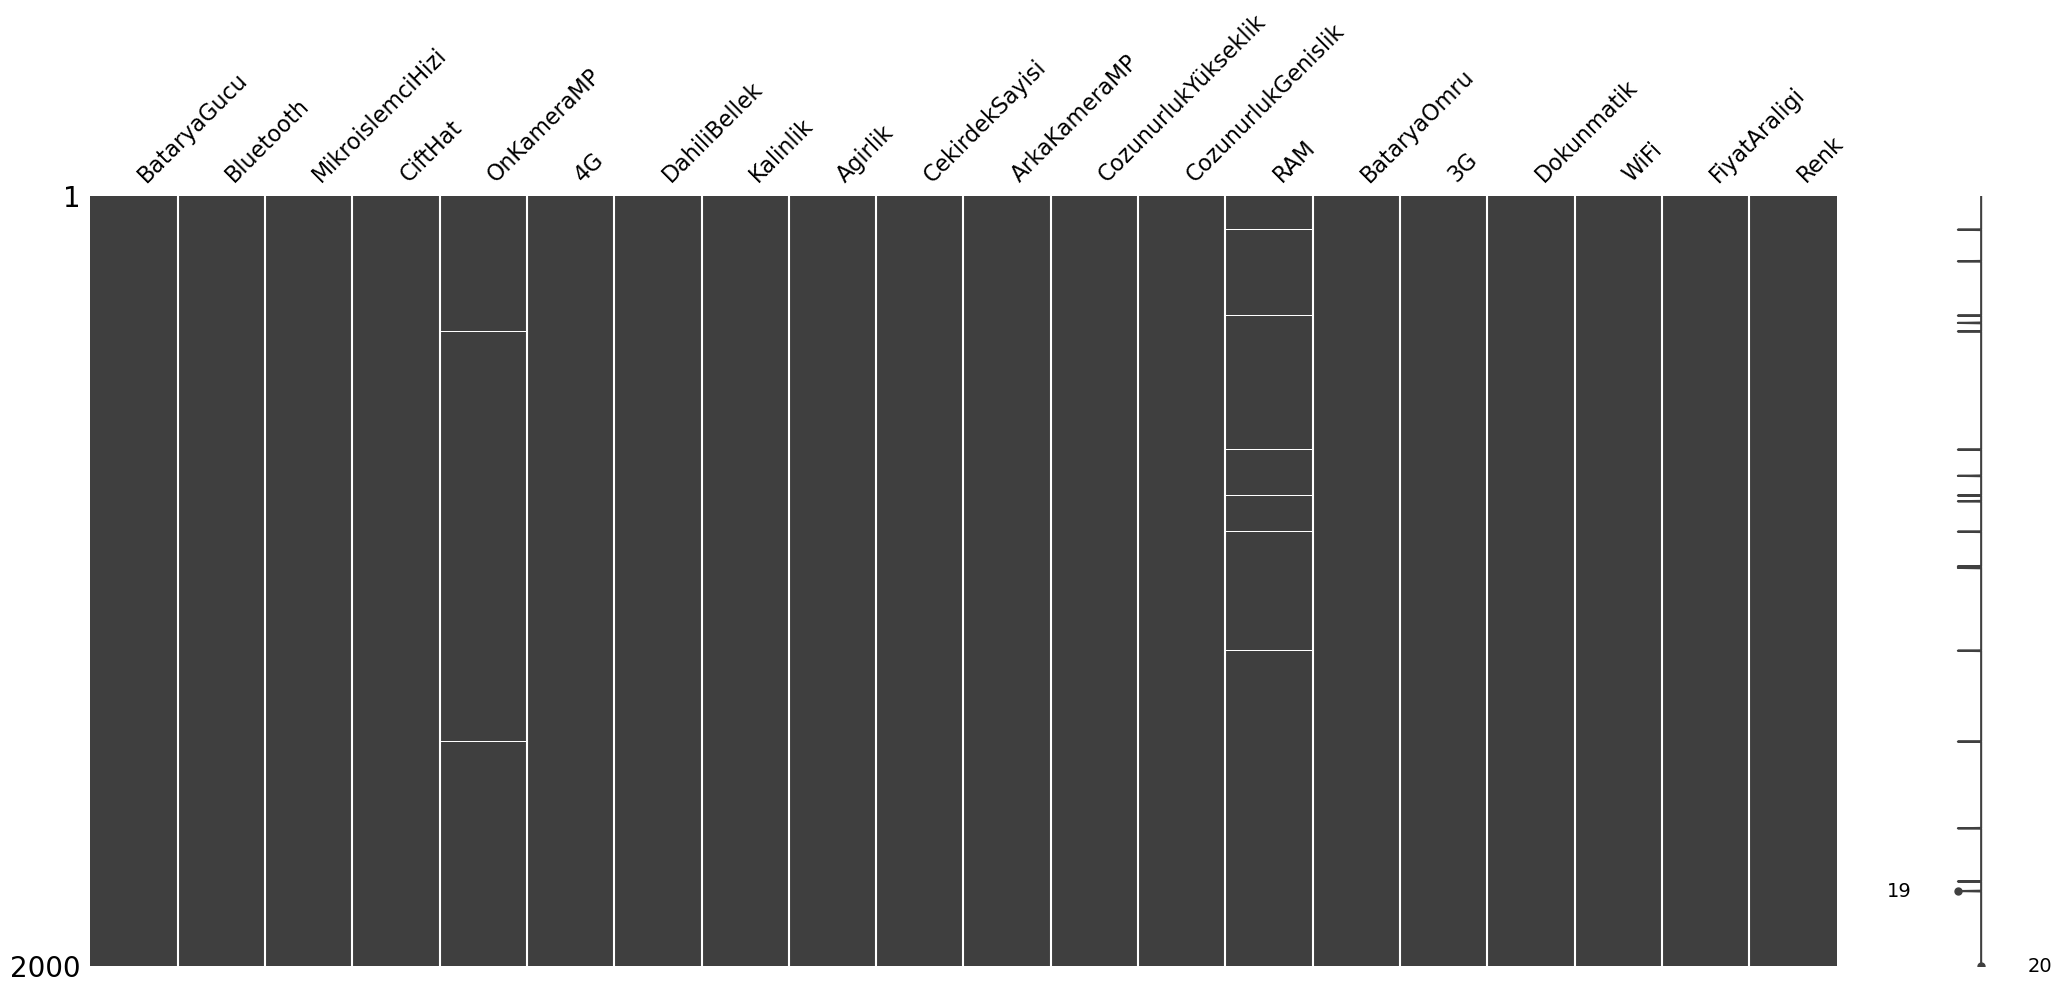

In [ ]:
# Veri çerçevemizdeki eksik değerleri görselleştirelim.
msg.matrix(df); # nerelerde eksik var görebiliriz  missingo kütüphanesini kullandık.

In [ ]:
# Veri çerçevemizdeki eksik değerleri her bir öznitelik için ortalama değerler ile dolduracağız. Bunun için ilk önce 'OnKameraMP' ve 'RAM' özniteliklerinin ortalama değerlerini görüntüleyelim ve sonrasında ise veri setimizdeki eksik değerleri ortalama değerler ile dolduralım.
df["OnKameraMP"].mean() # ortalama kamera mp'si

4.312280701754386

In [ ]:
df["RAM"].mean() # ortalama ram değeri.

2116.243963782696

In [ ]:
# Boşulkları ortalamayla doldurduktan sonra veri çerçevemizin rastgele 10 değişkenini görüntüleyelim.

df = df.fillna(df.mean()) # her eksik veri kendi sutunundaki eksik olmayan verilerin ortalaması ile doldurulur.
df.sample(10)

C:\Users\emrea\AppData\Local\Temp\ipykernel_27384\2870966600.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1280,1820,Var,1.7,Var,0.0,Var,64,0.6,161,1,3,1157,1951,574.0,18,Var,Var,Yok,Ucuz,Yeşil
525,881,Yok,1.0,Yok,1.0,Yok,64,0.5,160,3,6,115,636,2110.0,6,Var,Var,Var,Ucuz,Mor
756,1925,Yok,3.0,Var,0.0,Var,16,0.8,175,8,11,983,1087,2173.0,19,Var,Var,Yok,Normal,Pembe
90,891,Yok,0.5,Var,9.0,Var,25,0.3,196,2,19,375,1724,2073.0,10,Var,Yok,Var,Ucuz,Beyaz
38,706,Yok,0.5,Yok,13.0,Var,31,0.1,108,3,19,543,938,2419.0,4,Var,Yok,Var,Ucuz,Mavi
490,1938,Var,0.5,Var,5.0,Yok,44,0.5,121,2,9,1299,1935,3497.0,18,Yok,Var,Yok,Pahalı,Mavi
507,648,Var,1.8,Yok,1.0,Var,60,0.1,195,4,4,931,1811,819.0,4,Var,Yok,Yok,Çok Ucuz,Turkuaz
878,1108,Var,2.9,Yok,10.0,Yok,52,0.1,183,2,12,130,1706,3264.0,13,Yok,Var,Var,Pahalı,Siyah
1153,1829,Var,2.1,Yok,8.0,Yok,59,0.1,91,5,15,1457,1919,3142.0,5,Var,Var,Var,Pahalı,Siyah
1925,664,Yok,1.2,Var,0.0,Yok,28,0.9,106,5,5,754,1497,2042.0,19,Var,Var,Yok,Ucuz,Kahverengi


In [ ]:
# Veri çerçevemizdeki eksik değerlerin dolduğundan emin olalım.
df.isna().sum() # burada görüldüğü gibi hiçbir boş veri yok. hepsini doldurduk.

BataryaGucu            0
Bluetooth              0
MikroislemciHizi       0
CiftHat                0
OnKameraMP             0
4G                     0
DahiliBellek           0
Kalinlik               0
Agirlik                0
CekirdekSayisi         0
ArkaKameraMP           0
CozunurlukYükseklik    0
CozunurlukGenislik     0
RAM                    0
BataryaOmru            0
3G                     0
Dokunmatik             0
WiFi                   0
FiyatAraligi           0
Renk                   0
dtype: int64

In [ ]:
# Veri çerçevemizdeki Renk özniteliğine ait benzersiz değişkenlere bakalım.
df["Renk"].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

In [ ]:
# Renklerin birbirlerine üstünlüğü olmadığı için 'get_dummies' kullanarak Renk özniteliğine dair kategorik öznitelik çıkarımında bulunalım.

df_Renkler = pd.get_dummies(df["Renk"])
df_Renkler.head()

,Beyaz,Gri,Kahverengi,Kırmızı,Mavi,Mor,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df, df_Renkler], axis = 1)
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Kahverengi,Kırmızı,Mavi,Mor,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,...,0,0,0,1,0,0,0,0,0,0
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Renk özniteliğini ve dummy olarak yaratılan Renk'lerden birini silip veri çerçevemizi güncelleyelim. Dummy olarak yaratılan Renk'lerden birini hariç tutmamızın sebebi veri setinde kategorik değişkenlerin sınıf sayısından daha az sayıda dummy değişken olması gerektiğidir.

df.drop(["Mor", "Renk"], axis = 1, inplace = True)
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Gri,Kahverengi,Kırmızı,Mavi,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,...,0,0,0,0,0,0,0,0,0,0
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Veri çerçevemizdeki ordinal değerleri inceleyelim.

kategori = pd.Categorical(df['ArkaKameraMP'], ordered=True )
print(kategori)

[10, 0, 4, 14, 18, ..., 6, 2, 14, 6, 10]
Length: 2000
Categories (21, int64): [0 < 1 < 2 < 3 ... 17 < 18 < 19 < 20]


In [ ]:
kategori = pd.Categorical(df['DahiliBellek'], ordered=True )
print(kategori)

[50, 58, 16, 50, 18, ..., 7, 11, 56, 53, 26]
Length: 2000
Categories (63, int64): [2 < 3 < 4 < 5 ... 61 < 62 < 63 < 64]


In [ ]:
# FiyatAraligi özniteliğine ait 4 adet benzersiz değer olduğunu söylemiştik (Normal, Pahalı, Ucuz, Çok Ucuz). Şimdi bu bölümde bu değerleri sayısallaştıralım. (Normal, Pahalı, Ucuz, Çok Ucuz) değerlerini, (0-1-2-3) sayısal değerleri ile değiştirelim.

df["FiyatAraligi"] = df["FiyatAraligi"].replace("Çok Ucuz",0)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Ucuz",1)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Normal",2)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Pahalı",3)

In [ ]:
# Veri çerçevemizdeki tipi object olan özniteliklerin 'var' ve 'yok' olmak üzere iki değeri olduğundan bu değerleri sayısallaştıralım. (Var=1, Yok=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           2000 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  2000 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [ ]:
df.replace("Var",1,inplace=True)
df.replace("Yok",0,inplace=True)
df.head(10)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Gri,Kahverengi,Kırmızı,Mavi,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,0,0,0,0,0,0,0,0,0,0
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
5,1162,0,1.0,0,0.0,0,50,0.5,104,4,...,0,0,0,0,0,0,0,0,0,0
6,1849,1,0.5,0,1.0,0,29,0.5,181,7,...,1,0,0,0,0,0,0,0,0,0
7,1860,0,0.5,1,2.0,1,55,0.7,83,6,...,0,0,0,0,0,0,0,0,0,0
8,1536,0,0.8,0,12.0,0,13,0.3,105,7,...,0,0,0,0,0,1,0,0,0,0
9,539,1,0.6,1,9.0,0,21,0.1,145,7,...,0,0,0,1,0,0,0,0,0,0


# MAKİNE ÖĞRENMESİ MODELLEMESİ

In [ ]:
# FiyatAraligi" özniteliğnii bağımlı değişken, geriye kalan diğer öznitelikleri de bağımsız değişken olmak üzere bu veri setini 'X' ve 'y' şeklinde ikiye ayıralım. y = bağımlı değişken , X = bağımsız değişkenler

y = df["FiyatAraligi"]
X = df.drop("FiyatAraligi", axis = 1)

In [ ]:
# Bağımsız değişkenimiz 2000 gözlem ve 29 öznitelikten oluştuğu görülmektedir.
X # 2000 satır ve 29 sutundan oluşuyor.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Gri,Kahverengi,Kırmızı,Mavi,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,0,0,0,0,1,0,0,0,0,0
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,0,0,0,0,0,0,0,0,0,0
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,0,0,0,0,0,0,0,0,1,0
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,0,2.9,1,3.0,1,7,0.8,147,2,...,0,0,0,0,0,0,1,0,0,0
1996,1654,0,1.8,0,1.0,0,11,0.3,146,7,...,0,0,0,0,0,1,0,0,0,0
1997,742,0,2.2,1,4.0,0,56,0.2,190,7,...,0,0,0,0,0,0,0,0,1,0
1998,704,0,2.2,1,4.0,0,53,0.2,186,6,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y

0       2
1       3
2       1
3       3
4       2
       ..
1995    0
1996    1
1997    3
1998    2
1999    2
Name: FiyatAraligi, Length: 2000, dtype: int64

In [ ]:
# Bu değişkenlerde train ve test olmak üzere 4 parça oluşturalım. Veri setindeki verilerin %75'ini eğitim için, kalan %25'ini de test için ayıralım.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
y_train

1738    0
548     1
936     1
1389    2
1607    2
       ..
1130    0
1294    3
860     2
1459    2
1126    1
Name: FiyatAraligi, Length: 1500, dtype: int64

In [ ]:
y_test

1860    1
353     0
1333    2
905     1
1289    2
       ..
765     0
1356    0
408     0
1614    3
694     2
Name: FiyatAraligi, Length: 500, dtype: int64

In [ ]:
X_train

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Gri,Kahverengi,Kırmızı,Mavi,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
1738,867,0,1.4,1,0.0,1,4,0.7,135,6,...,0,0,0,0,0,0,1,0,0,0
548,1404,0,2.1,0,16.0,0,44,0.9,151,1,...,0,1,0,0,0,0,0,0,0,0
936,683,1,2.1,0,7.0,0,30,0.1,197,7,...,0,0,0,0,0,0,1,0,0,0
1389,1109,1,2.8,1,6.0,0,57,0.9,151,1,...,0,0,0,0,0,0,0,0,1,0
1607,1395,0,1.8,1,0.0,0,23,0.1,111,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,605,0,1.0,0,8.0,1,9,0.1,142,3,...,0,0,1,0,0,0,0,0,0,0
1294,1149,1,2.2,0,4.0,0,30,0.2,106,6,...,0,1,0,0,0,0,0,0,0,0
860,534,0,0.5,1,4.0,0,2,0.2,85,5,...,1,0,0,0,0,0,0,0,0,0
1459,1720,0,1.6,0,18.0,1,2,0.8,188,5,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_test

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Gri,Kahverengi,Kırmızı,Mavi,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil
1860,1433,1,2.3,0,2.0,1,5,0.1,129,5,...,0,0,0,0,0,0,0,0,0,0
353,1174,1,0.9,0,7.0,0,30,1.0,147,4,...,0,0,0,0,0,0,1,0,0,0
1333,999,0,2.6,1,11.0,1,56,1.0,165,4,...,0,0,0,0,1,0,0,0,0,0
905,972,1,0.5,1,5.0,0,13,0.4,193,5,...,0,0,0,0,0,0,0,1,0,0
1289,1811,1,2.5,0,4.0,1,5,0.6,98,4,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1530,0,2.0,0,11.0,0,42,0.8,177,6,...,0,0,0,0,0,0,0,0,0,0
1356,668,0,2.3,0,2.0,1,48,0.3,114,1,...,0,0,0,0,0,0,0,1,0,0
408,1179,1,0.8,0,1.0,0,5,0.9,154,5,...,0,0,1,0,0,0,0,0,0,0
1614,1456,0,1.6,1,9.0,1,39,0.1,80,8,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# GaussianNB modelimizi yaratalım. Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim. Sonrasında ise modele daha önce görmediği bağımlı test değişkenini (y_test) tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

In [ ]:
# X_test'i vererek y_test'i tahmin etmesini isteyelim.

y_pred = nb_model.predict(X_test)

In [ ]:
# Doğruluk skorunu görüntülleyelim.

accuracy_score(y_test, y_pred)

0.752

In [ ]:
# Model üzerinde yazılabilecek tüm komutları görüntüleyelim.

dir(nb_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_parameter_constraints',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 '_validate_params',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'feature_names_in_',
 'fit',
 'get_metadata_r

In [ ]:
# Karmaşıklık matrisini oluşturalım.

karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[119  10   0   0]
 [  8  93  26   0]
 [  0  30  78  23]
 [  0   1  26  86]]


In [ ]:
# Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.
cross_val_score(nb_model, X_train, y_train, cv = 10)

array([0.68666667, 0.74      , 0.69333333, 0.78666667, 0.71333333,
       0.65333333, 0.76      , 0.68666667, 0.74      , 0.70666667])

In [ ]:
# 10 farklı değer için skorun ortalamasını görüntüleyelim.
cross_val_score(nb_model, X_train, y_train, cv = 10).mean()

0.7166666666666668

In [ ]:
# Sınıflandırma raporu çizdirelim.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       129
           1       0.69      0.73      0.71       127
           2       0.60      0.60      0.60       131
           3       0.79      0.76      0.77       113

    accuracy                           0.75       500
   macro avg       0.76      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



In [ ]:
# Yakalama Skorunu görüntüleyelim.

YakalamaSkoru = recall_score(y_test, y_pred, average='weighted')
YakalamaSkoru

0.752

In [ ]:
# F1 Skorunu görüntüleyelim.

F1Skoru = f1_score(y_test, y_pred, average = 'weighted')
F1Skoru

0.7525676695013979

In [ ]:
# Kesinlik Skorunu görüntüleyelim.

PrecisionSkoru = precision_score(y_test, y_pred, average='weighted')
PrecisionSkoru

0.7535435401911198

## KARAR AĞACI ALGORİTMASI

In [ ]:
# Modelimizi inşaa edelim ve eğitelim.

new = DecisionTreeClassifier(random_state = 42, criterion='entropy')
new_model = new.fit(X_train, y_train)
new_model

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#  Parametreleri optimize etmeden kurduğumuz bu model için tahminlerde bulunalım.

y_pred = new_model.predict(X_test)

In [ ]:
# Daha önce hiç görmediği 'X_test' verileri için bulunduğu tahminlere göre doğruluk skorunu görüntüleyelim.

accuracy_score(y_test, y_pred)

0.842

In [ ]:
#F1 Skorunu görüntüleyelim.

F1Skoru = f1_score(y_test, y_pred, average = 'weighted')
F1Skoru

0.8429638188299761

In [ ]:
# Karmaşıklık matrisini çizdirelim.

Karmasiklik_Matrisi = confusion_matrix(y_test, y_pred)
Karmasiklik_Matrisi

array([[114,  15,   0,   0],
       [  8, 110,   9,   0],
       [  0,  18, 102,  11],
       [  0,   0,  18,  95]], dtype=int64)

In [ ]:
# Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

cross_val_score(new_model, X, y, cv = 10)

array([0.81 , 0.84 , 0.845, 0.865, 0.865, 0.85 , 0.86 , 0.845, 0.855,
       0.835])

In [ ]:
cross_val_score(new_model, X, y, cv = 10).mean()

0.8469999999999999

In [ ]:
#Özniteliğin değerlerine göre sınıflandırma raporunu görüntüleyelim.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       129
           1       0.77      0.87      0.81       127
           2       0.79      0.78      0.78       131
           3       0.90      0.84      0.87       113

    accuracy                           0.84       500
   macro avg       0.85      0.84      0.84       500
weighted avg       0.85      0.84      0.84       500



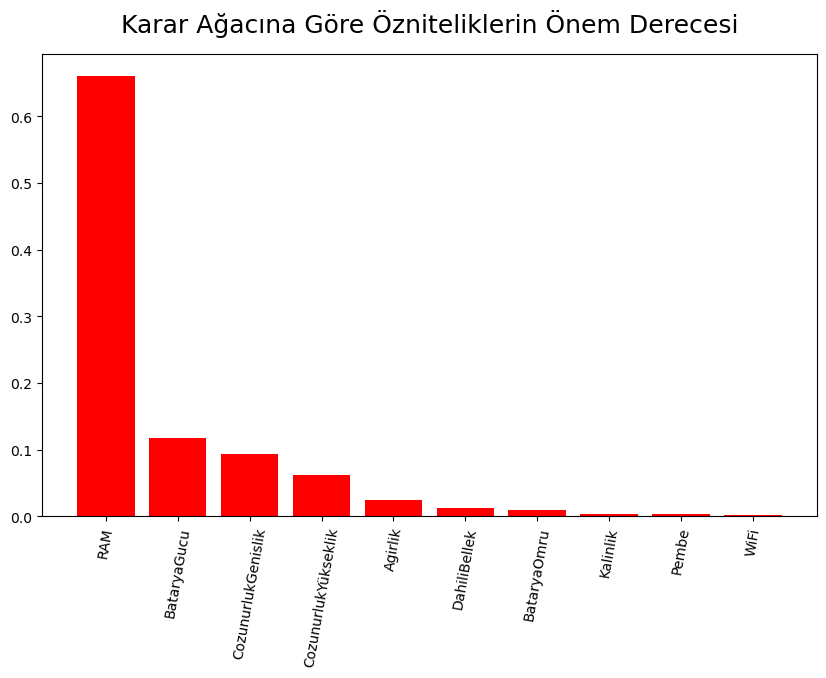

In [ ]:
# Modelin karar ağacını oluştururken RAM özniteliğine dayanarak karar verdiğini görüyoruz. Şimdi özniteliklerin karar ağacına göre önem sıralamasına bakalım.

ranking = new.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.figure(figsize = (10, 6))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="red", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()